In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import RandomizedSearchCV

In [2]:
df = pd.read_csv('./data/gerd.csv',index_col=0)

In [3]:
X = df.loc[:,['TRAC','RE-L-Ac','RE-L-Ak','RE-M-Wa','LESP','LES-length','IBP','HH']]

y = df['label']

In [4]:
X.replace('YES',1,inplace=True)
X.replace('NO',0,inplace=True)
X.replace('1.#J',1.0,inplace=True)
X.replace('--',0,inplace=True)
X.replace('-',0,inplace=True)

In [5]:
'''数据集划分'''
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,train_size=0.8,random_state= 123, stratify = y)

In [6]:
'''归一化'''
from sklearn.preprocessing import StandardScaler
standard_scaler = StandardScaler()
standard_scaler.fit(X_train)
X_train = standard_scaler.transform(X_train)
X_test = standard_scaler.transform(X_test)
X_all = standard_scaler.transform(X)

In [7]:
from collections import Counter
print("Before oversampling: ", Counter(y_train))

Before oversampling:  Counter({1: 502, 0: 238})


In [8]:
'''KNN'''
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
## 超参数调优
params = {
    'n_neighbors' : [n for n in range(1,50)],
    'weights' : ['uniform', 'distance'],
    'p': [i for i in range(1,7)]
}
# grid_knn = GridSearchCV(
#     estimator=KNeighborsClassifier(),
#     param_grid = params,
#     n_jobs=-1,
#     cv = 10
# )
rand_knn = RandomizedSearchCV(
    estimator=KNeighborsClassifier(),
    param_distributions = params,
    n_jobs=-1,
    cv = 10
)
rand_knn.fit(X_train,y_train)
# grid_knn.fit(X_train,y_train)

RandomizedSearchCV(cv=10, estimator=KNeighborsClassifier(), n_jobs=-1,
                   param_distributions={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8,
                                                        9, 10, 11, 12, 13, 14,
                                                        15, 16, 17, 18, 19, 20,
                                                        21, 22, 23, 24, 25, 26,
                                                        27, 28, 29, 30, ...],
                                        'p': [1, 2, 3, 4, 5, 6],
                                        'weights': ['uniform', 'distance']})

In [9]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
pipeline_lr = Pipeline([
    ('PolynomialFeatures', PolynomialFeatures()),
    ('LR', LogisticRegression())
    
])
params_lr = {
    'LR__C': [0.0001,0.001,0.01,0.1,2,3,5,10,15,20,25,30,40,50,60,70,80,90,100,1000],
    'LR__penalty': ['l2','l1'],
    'LR__solver': ['liblinear'],
    'LR__max_iter':[10000],
    'PolynomialFeatures__degree': [i for i in range(1, 3)]
}
rand_lr = RandomizedSearchCV(
    estimator=pipeline_lr,
    param_distributions = params_lr,
    n_jobs=-1,
    cv = 10
)

rand_lr.fit(X_train,y_train)

RandomizedSearchCV(cv=10,
                   estimator=Pipeline(steps=[('PolynomialFeatures',
                                              PolynomialFeatures()),
                                             ('LR', LogisticRegression())]),
                   n_jobs=-1,
                   param_distributions={'LR__C': [0.0001, 0.001, 0.01, 0.1, 2,
                                                  3, 5, 10, 15, 20, 25, 30, 40,
                                                  50, 60, 70, 80, 90, 100,
                                                  1000],
                                        'LR__max_iter': [10000],
                                        'LR__penalty': ['l2', 'l1'],
                                        'LR__solver': ['liblinear'],
                                        'PolynomialFeatures__degree': [1, 2]})

In [10]:
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
pipeline_svc = Pipeline([
    ('PolynomialFeatures', PolynomialFeatures()),
    ('SVC', SVC(probability=True))
    
])
params_svm = {
    'SVC__C': [0.01,0.1,2,3,5,10,15,20,25,30,40,50,60,70,80,90,100],
    'SVC__gamma': [0.00001, 0.0001, 0.001, 0.1, 1, 10, 100, 1000],
    'SVC__kernel': ['rbf'],
#     'SVC__probability':['True'],
    'PolynomialFeatures__degree': [i for i in range(1, 3)]
}
# grid_svm = GridSearchCV(
#     estimator=pipeline_svc,
#     param_grid=params_svm,
#     n_jobs = -1,
#     cv = 10
# )
# grid_svm.fit(X_train,y_train)
rand_svm = RandomizedSearchCV(
    estimator=pipeline_svc,
    param_distributions = params_svm,
    n_jobs=-1,
    cv = 10
)
rand_svm.fit(X_train,y_train)

RandomizedSearchCV(cv=10,
                   estimator=Pipeline(steps=[('PolynomialFeatures',
                                              PolynomialFeatures()),
                                             ('SVC', SVC(probability=True))]),
                   n_jobs=-1,
                   param_distributions={'PolynomialFeatures__degree': [1, 2],
                                        'SVC__C': [0.01, 0.1, 2, 3, 5, 10, 15,
                                                   20, 25, 30, 40, 50, 60, 70,
                                                   80, 90, 100],
                                        'SVC__gamma': [1e-05, 0.0001, 0.001,
                                                       0.1, 1, 10, 100, 1000],
                                        'SVC__kernel': ['rbf']})

In [11]:
from sklearn.tree import DecisionTreeClassifier
params_dt = {
    'max_depth': [i for i in range(3,10)],
    'min_samples_split' : [i for i in range(3,10)],
    'min_samples_leaf': [i for i in range(3,10)],
    'criterion':['gini', 'entropy', 'log_loss']
}
# grid_dt = GridSearchCV(
#     estimator=DecisionTreeClassifier(),
#     param_grid=params_dt,
#     n_jobs = -1,
#     cv = 10
# )
# grid_dt.fit(X_train,y_train)
rand_dt = RandomizedSearchCV(
    estimator=DecisionTreeClassifier(),
    param_distributions = params_dt,
    n_jobs=-1,
    cv = 10
)
rand_dt.fit(X_train,y_train)

RandomizedSearchCV(cv=10, estimator=DecisionTreeClassifier(), n_jobs=-1,
                   param_distributions={'criterion': ['gini', 'entropy',
                                                      'log_loss'],
                                        'max_depth': [3, 4, 5, 6, 7, 8, 9],
                                        'min_samples_leaf': [3, 4, 5, 6, 7, 8,
                                                             9],
                                        'min_samples_split': [3, 4, 5, 6, 7, 8,
                                                              9]})

In [12]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train,y_train)

GaussianNB()

In [13]:
from sklearn.ensemble import VotingClassifier
clf = [
    KNeighborsClassifier(),
    LogisticRegression(),
    DecisionTreeClassifier(),
    SVC(probability=True)
]
vclf = VotingClassifier(
    estimators = [
        ('knn', clf[0]),
        ('lr', clf[1]),
        ('dt', clf[2]),
        ('svm',clf[3])
    ],
    voting = 'soft'
)
params = {
    'knn__n_neighbors' : [n for n in range(1,50)],
    'knn__weights' : ['uniform', 'distance'],
    'knn__p': [i for i in range(1,7)],
    'lr__C': [0.0001,0.001,0.01,0.1,2,3,5,10,15,20,25,30,40,50,60,70,80,90,100,1000],
    'lr__penalty': ['l2','l1'],
    'lr__solver': ['liblinear'],
    'lr__max_iter':[10000],
    'lr__multi_class':['multinomial','ovr'],
    'svm__C': [0.01,0.1,2,3,5,10,15,20,25,30,40,50,60,70,80,90,100],
    'svm__gamma': [0.00001, 0.0001, 0.001, 0.1, 1, 10, 100, 1000],
    'svm__kernel': ['rbf'],
    'dt__max_depth': [i for i in range(3,10)],
    'dt__min_samples_split' : [i for i in range(3,10)],
    'dt__min_samples_leaf': [i for i in range(3,10)],
    'dt__criterion':['gini', 'entropy', 'log_loss']
    }
from sklearn.model_selection import RandomizedSearchCV 
 
random_cv = RandomizedSearchCV( 
    vclf, params, n_iter=100, cv=10, scoring="neg_log_loss", n_jobs=-1
)

random_cv.fit(X_train,y_train)

/usr/local/anaconda3/envs/AICore/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/anaconda3/envs/AICore/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/anaconda3/envs/AICore/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/anaconda3/envs/AICore/lib/python3.12/site

RandomizedSearchCV(cv=10,
                   estimator=VotingClassifier(estimators=[('knn',
                                                           KNeighborsClassifier()),
                                                          ('lr',
                                                           LogisticRegression()),
                                                          ('dt',
                                                           DecisionTreeClassifier()),
                                                          ('svm',
                                                           SVC(probability=True))],
                                              voting='soft'),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'dt__criterion': ['gini', 'entropy',
                                                          'log_loss'],
                                        'dt__max_depth': [3, 4, 5, 6, 7, 8, 9],
                                        'dt__min_samples_leaf': [3, 4, 5...
                                        'lr__C': [0.0001, 0.001, 0.01, 0.1, 2,
                                                  3, 5, 10, 15, 20, 25, 30, 40,
                                                  50, 60, 70, 80, 90, 100,
                                                  1000],
                                        'lr__max_iter': [10000],
                                        'lr__multi_class': ['multinomial',
                                                            'ovr'],
                                        'lr__penalty': ['l2', 'l1'],
                                        'lr__solver': ['liblinear'],
                                        'svm__C': [0.01, 0.1, 2, 3, 5, 10, 15,
                                                   20, 25, 30, 40, 50, 60, 70,
                                                   80, 90, 100],
                                        'svm__gamma': [1e-05, 0.0001, 0.001,
                                                       0.1, 1, 10, 100, 1000],
                                        'svm__kernel': ['rbf']},
                   scoring='neg_log_loss')

In [14]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV 
rf_clf = RandomForestClassifier(oob_score=True,random_state=321,bootstrap=True)
params_rf = {
    'n_estimators': [10,20,30,50,70,100,125,150,175,200,250],
    'max_samples':[40,50,60,70,80,90,100,120,140],
    'max_depth': [i for i in range(3,10)],
    'min_samples_split' : [i for i in range(3,10)],
    'min_samples_leaf': [i for i in range(3,10)],
    'criterion':['gini', 'entropy', 'log_loss']
}
random_cv_rf = RandomizedSearchCV( 
    rf_clf, params_rf, n_iter=10000, cv=10, scoring="roc_auc", n_jobs=-1
)

random_cv_rf.fit(X_train,y_train)

RandomizedSearchCV(cv=10,
                   estimator=RandomForestClassifier(oob_score=True,
                                                    random_state=321),
                   n_iter=10000, n_jobs=-1,
                   param_distributions={'criterion': ['gini', 'entropy',
                                                      'log_loss'],
                                        'max_depth': [3, 4, 5, 6, 7, 8, 9],
                                        'max_samples': [40, 50, 60, 70, 80, 90,
                                                        100, 120, 140],
                                        'min_samples_leaf': [3, 4, 5, 6, 7, 8,
                                                             9],
                                        'min_samples_split': [3, 4, 5, 6, 7, 8,
                                                              9],
                                        'n_estimators': [10, 20, 30, 50, 70,
                                                         100, 125, 150, 175,
                                                         200, 250]},
                   scoring='roc_auc')

In [15]:
from sklearn.ensemble import ExtraTreesClassifier
et_clf = ExtraTreesClassifier(oob_score=True,random_state=123,bootstrap=True)
params_rf = {
    'n_estimators': [200],
    'max_samples':[1,3,5,7,10,20,30,40,50,60,70,80,90,100,120],
    'max_depth': [i for i in range(3,10)],
    'min_samples_split' : [i for i in range(3,10)],
    'min_samples_leaf': [i for i in range(3,10)],
    'criterion':['gini', 'entropy', 'log_loss']
}
random_cv_et = RandomizedSearchCV( 
    et_clf, params_rf, n_iter=10000, cv=10, scoring="roc_auc", n_jobs=-1
)

random_cv_et.fit(X_train,y_train)

RandomizedSearchCV(cv=10,
                   estimator=ExtraTreesClassifier(bootstrap=True,
                                                  oob_score=True,
                                                  random_state=123),
                   n_iter=10000, n_jobs=-1,
                   param_distributions={'criterion': ['gini', 'entropy',
                                                      'log_loss'],
                                        'max_depth': [3, 4, 5, 6, 7, 8, 9],
                                        'max_samples': [1, 3, 5, 7, 10, 20, 30,
                                                        40, 50, 60, 70, 80, 90,
                                                        100, 120],
                                        'min_samples_leaf': [3, 4, 5, 6, 7, 8,
                                                             9],
                                        'min_samples_split': [3, 4, 5, 6, 7, 8,
                                                              9],
                                        'n_estimators': [200]},
                   scoring='roc_auc')

In [15]:
from sklearn.ensemble import BaggingClassifier
bagging = BaggingClassifier(
    n_estimators = 200,
    bootstrap=True,
    oob_score=True,
    bootstrap_features=True,
    random_state=123
)
params_bagging = {
    'estimator':[DecisionTreeClassifier(),SVC(probability=True),LogisticRegression(),KNeighborsClassifier()],
    'max_features':[i for i in range(1,10)],
    'max_samples':[1,3,5,7,10,20,30,40,50,60,70,80,90,100,120],
#     'max_depth': [i for i in range(3,10)],
#     'min_samples_split' : [i for i in range(3,10)],
#     'min_samples_leaf': [i for i in range(3,10)],
#     'criterion':['gini', 'entropy', 'log_loss']
}
# random_bagging = GridSearchCV( 
#     bagging, params_bagging,  cv=10,  n_jobs=16 
# )
random_bagging = RandomizedSearchCV( 
    bagging, params_bagging,  cv=10,  n_jobs=16 
)

random_bagging.fit(X_train,y_train)

/usr/local/anaconda3/envs/AICore/lib/python3.12/site-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
21 fits failed out of a total of 100.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
11 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/anaconda3/envs/AICore/lib/python3.12/site-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/anaconda3/envs/AICore/lib/python3.12/site-packages/sklearn/utils/validation.py", line 63, in inner_f
    return f(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^
  File "/usr/local/anaconda3/envs/AICore/lib/python3.12/site-packages/sklearn/base.py", lin

RandomizedSearchCV(cv=10,
                   estimator=BaggingClassifier(bootstrap_features=True,
                                               n_estimators=200, oob_score=True,
                                               random_state=123),
                   n_jobs=16,
                   param_distributions={'estimator': [DecisionTreeClassifier(),
                                                      SVC(probability=True),
                                                      LogisticRegression(),
                                                      KNeighborsClassifier()],
                                        'max_features': [1, 2, 3, 4, 5, 6, 7, 8,
                                                         9],
                                        'max_samples': [1, 3, 5, 7, 10, 20, 30,
                                                        40, 50, 60, 70, 80, 90,
                                                        100, 120]})

In [16]:
from sklearn.ensemble import AdaBoostClassifier
ada_clf = AdaBoostClassifier(
    DecisionTreeClassifier(),
    n_estimators=200
)
ada_clf.fit(X_train,y_train)

AdaBoostClassifier(estimator=DecisionTreeClassifier(), n_estimators=200)

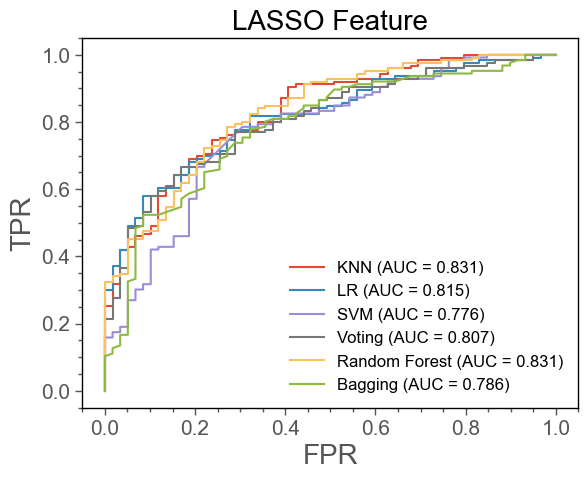

In [20]:
fig,ax= plt.subplots()

bwith = 1
plt.style.use("ggplot")
plt.rcParams['font.sans-serif'] = 'Arial'
ax.spines['bottom'].set_visible(True)#图框下边
ax.spines['left'].set_visible(True)#图框左边
ax.spines['top'].set_visible(True)#图框上边
ax.spines['right'].set_visible(True)#图框右边
ax.spines['bottom'].set_linewidth(bwith)#图框下边
ax.spines['left'].set_linewidth(bwith)#图框左边
ax.spines['top'].set_linewidth(bwith)#图框上边
ax.spines['right'].set_linewidth(bwith)#图框右边
ax.spines['bottom'].set_linestyle("-")
ax.spines['bottom'].set_color('black')
ax.spines['left'].set_linestyle("-")
ax.spines['left'].set_color('black')
ax.spines['top'].set_linestyle("-")
ax.spines['top'].set_color('black')
ax.spines['right'].set_linestyle("-")
ax.spines['right'].set_color('black')
ax.set_facecolor("white")
ax.minorticks_on()
ax.tick_params(axis="both", which="major", direction="out", width=1, length=5, labelsize=15)
ax.tick_params(axis="both", which="minor", direction="out", width=1, length=3, labelsize=15)

y_score_knn = rand_knn.best_estimator_.predict_proba(X_test)
auc_knn = roc_auc_score(y_test,y_score_knn[:,1])
fpr_knn,tpr_knn,thres_knn = roc_curve(y_test,y_score_knn[:,1])
plt.plot(fpr_knn,tpr_knn,label = 'KNN (AUC = %0.3f)' % auc_knn)

y_decition_lr = rand_lr.best_estimator_.decision_function(X_test)
auc_log = roc_auc_score(y_test,y_decition_lr)
fpr_log,tpr_log,thres_log = roc_curve(y_test,y_decition_lr)
plt.plot(fpr_log,tpr_log,label = 'LR (AUC = %0.3f)' % auc_log)

y_decition_svm = rand_svm.best_estimator_.decision_function(X_test)
auc_svm = roc_auc_score(y_test,y_decition_svm)
fpr_svm,tpr_svm,thres_svm = roc_curve(y_test,y_decition_svm)
plt.plot(fpr_svm,tpr_svm,label = 'SVM (AUC = %0.3f)' % auc_svm)
                                      
y_decition_rf = random_cv_rf.best_estimator_.predict_proba(X_test)
auc_rf = roc_auc_score(y_test,y_decition_rf[:,1])
fpr_rf,tpr_rf,thres_rf = roc_curve(y_test,y_decition_rf[:,1])
plt.plot(fpr_rf,tpr_rf,label = 'Voting (AUC = %0.3f)' % auc_rf)

y_decition_vo = random_cv.best_estimator_.predict_proba(X_test)
auc_vo = roc_auc_score(y_test,y_decition_vo[:,1])
fpr_vo,tpr_vo,thres_vo = roc_curve(y_test,y_decition_vo[:,1])
## ROC曲线
plt.plot(fpr_vo,tpr_vo,label = 'Random Forest (AUC = %0.3f)' % auc_vo)
                                      
# y_decition_et = random_cv_et.best_estimator_.predict_proba(X_test)
# auc_et = roc_auc_score(y_test,y_decition_et[:,1])
# fpr_et,tpr_et,thres_et = roc_curve(y_test,y_decition_et[:,1])
# plt.plot(fpr_et,tpr_et,label = 'Extra Forest AUC = %0.2f' % auc_et)

y_decition_bagging = random_bagging.best_estimator_.predict_proba(X_test)
auc_bagging = roc_auc_score(y_test,y_decition_bagging[:,1])
fpr_bagging,tpr_bagging,thres_bagging = roc_curve(y_test,y_decition_bagging[:,1])
plt.plot(fpr_bagging,tpr_bagging,label = 'Bagging (AUC = %0.3f)' % auc_bagging)

plt.grid(False)
plt.xlabel('FPR',fontsize=20)
plt.ylabel('TPR',fontsize=20)
plt.legend(frameon=False,fontsize=12)
plt.title('LASSO Feature',fontsize=20)
plt.savefig('Lasso.svg',dpi=1000)
plt.show()

In [26]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

y_predict =  random_cv_rf.best_estimator_.predict(X_test)
# cm = confusion_matrix(y_train,y_predict)
# print(cm)
print(accuracy_score(y_test,y_predict))
print(precision_score(y_test,y_predict))
print(recall_score(y_test,y_predict))
print(f1_score(y_test,y_predict))

0.7351351351351352
0.7549668874172185
0.9047619047619048
0.8231046931407943


In [29]:
a = random_cv_rf.best_estimator_.predict_proba(X_test)

In [31]:
a = pd.DataFrame(a)

In [35]:
a.to_excel('./lasso_res.xlsx')

In [37]:
auc_rf

0.8069679849340866

In [38]:
nf = pd.read_csv('./南方医科大学深圳医院测酸测压数据.csv',index_col=0)

In [44]:
X = df.loc[:,['RE-L-Ak','RE-M-Wa','HH','LESP','TRAC']]

y = df['label']
X.replace('YES',1,inplace=True)
X.replace('NO',0,inplace=True)
X.replace('1.#J',1.0,inplace=True)
X.replace('--',0,inplace=True)
X.replace('-',0,inplace=True)

In [ ]:
nf.columns

In [43]:
X_new = nf.loc[:,['RE-L-Ak','RE-M-Wa','HH','LESP','TRAC']]

y_new = nf['label']

In [45]:
'''归一化'''
'''数据集划分'''
from sklearn.preprocessing import StandardScaler
standard_scaler = StandardScaler()
standard_scaler.fit(X)
X_train = standard_scaler.transform(X)
X_test = standard_scaler.transform(X_new)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV 
rf_clf = RandomForestClassifier(oob_score=True,random_state=321,bootstrap=True)
params_rf = {
    'n_estimators': [10,20,30,50,70,100,125,150,175,200,250],
    'max_samples':[40,50,60,70,80,90,100,120,140],
    'max_depth': [i for i in range(3,10)],
    'min_samples_split' : [i for i in range(3,10)],
    'min_samples_leaf': [i for i in range(3,10)],
    'criterion':['gini', 'entropy', 'log_loss']
}
grid_rf = GridSearchCV(
    estimator=rf_clf,
    param_grid=params_rf,
    n_jobs = -1,
    cv = 10
)
grid_rf.fit(X_train,y)

In [47]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

y_predict =  grid_rf.best_estimator_.predict(X_test)
# cm = confusion_matrix(y_train,y_predict)
# print(cm)
print(accuracy_score(y_new,y_predict))
print(precision_score(y_new,y_predict))
print(recall_score(y_new,y_predict))
print(roc_auc_score(y_new,y_predict))

0.7555555555555555
0.725
1.0
0.65625


In [64]:
test_ = pd.read_excel('./test.xlsx',index_col=0)
test_= test_.T
X_a =  standard_scaler.transform(test_[['TRAC','RE-L-Ac','RE-L-Ak','RE-M-Wa','LESP','LES-length','IBP','HH']])
ans = random_cv_rf.best_estimator_.predict_proba(X_a)

In [65]:
ans

array([[0.57734127, 0.42265873],
       [0.16867725, 0.83132275]])